In [2]:
import pandas as pd 

data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data = data.drop(columns=['Gender','CustomerID'])

In [5]:
data.shape

(200, 3)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test = train_test_split(data, test_size=0.3)

KMeans Clustering

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=6)
kmeans.fit(X_train)

KMeans(n_clusters=6)

In [8]:
kmeans.cluster_centers_

array([[26.96551724, 54.93103448, 50.03448276],
       [56.12903226, 53.61290323, 49.80645161],
       [33.44444444, 85.96296296, 81.85185185],
       [42.6       , 25.66666667, 21.33333333],
       [43.43478261, 87.52173913, 17.82608696],
       [26.6       , 27.26666667, 81.13333333]])

In [9]:
kmeans.inertia_

38281.73654534739

In [10]:
kmeans.labels_

array([3, 0, 1, 0, 0, 3, 3, 4, 5, 4, 1, 5, 4, 0, 3, 3, 5, 5, 3, 0, 1, 1,
       0, 0, 4, 1, 0, 3, 2, 4, 4, 2, 2, 0, 3, 2, 3, 2, 5, 4, 1, 1, 5, 2,
       0, 4, 4, 3, 5, 2, 0, 2, 4, 2, 1, 1, 4, 0, 1, 2, 2, 4, 0, 0, 1, 4,
       2, 0, 0, 2, 1, 3, 3, 1, 1, 2, 3, 0, 1, 2, 0, 0, 2, 4, 0, 3, 1, 2,
       3, 2, 1, 0, 1, 5, 2, 2, 5, 1, 5, 2, 5, 1, 1, 1, 2, 2, 4, 1, 5, 4,
       2, 0, 1, 4, 1, 4, 4, 4, 2, 4, 1, 1, 0, 0, 0, 1, 0, 5, 5, 4, 1, 2,
       2, 0, 1, 0, 5, 0, 1, 4])

In [11]:
kmeans.n_clusters

6

In [12]:
kmeans.n_iter_

4

In [13]:
kmeans.predict(X_test)

array([5, 4, 3, 1, 4, 4, 4, 4, 2, 0, 2, 1, 4, 4, 1, 3, 1, 3, 5, 2, 5, 1,
       0, 0, 0, 0, 4, 3, 2, 2, 0, 1, 1, 2, 1, 3, 1, 4, 4, 5, 4, 1, 0, 0,
       2, 2, 1, 4, 5, 0, 2, 5, 2, 5, 1, 3, 2, 1, 2, 3])

Plot Elbow Curve

In [14]:
WSS = []
for k in range(2,13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    WSS.append(kmeans.inertia_)
print(WSS) 

[141818.53639371382, 95974.27626924677, 70609.72942834138, 50952.15297906602, 38281.73654534739, 33685.24712735798, 31136.24046783626, 26614.240364072954, 24171.388086883875, 22999.998611111107, 20627.868113912227]


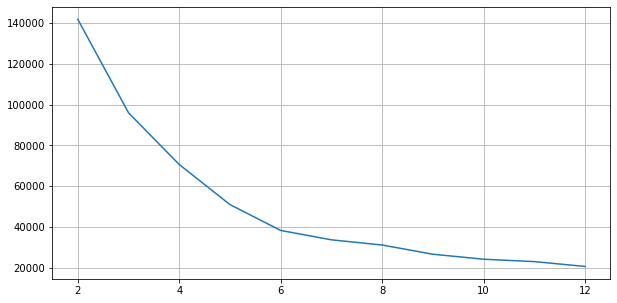

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(2,13),WSS)
plt.grid(True)

Locate Elbow in Elbow Curve

In [16]:
from kneed import KneeLocator

kl = KneeLocator(range(2, 13), WSS, curve="convex", direction="decreasing")
kl.elbow

6

Plot Silhouette Curve

In [17]:
from sklearn.metrics import silhouette_score

s_avg = []
for k in range(2, 13):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_train)
    sil_sc = silhouette_score(X_train, kmeans.labels_)
    s_avg.append(sil_sc)
print(s_avg)

[0.28309883557473736, 0.3870384440219553, 0.41195488143108616, 0.4502152775191105, 0.4597720703309054, 0.4474012457456449, 0.44246784001173417, 0.4059293689203291, 0.3884280023829654, 0.3821156894826586, 0.35998691667304916]


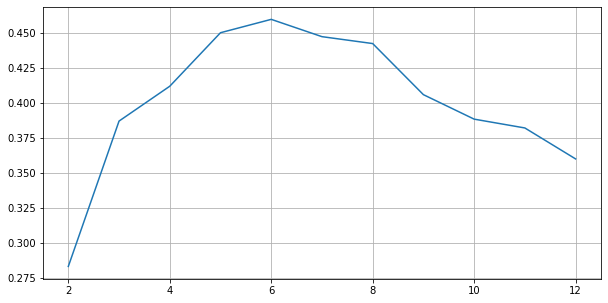

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(range(2,13),s_avg)
plt.grid(True)

plt.show()

Agglomerative Clustering

In [20]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters = 3,affinity='euclidean', linkage='ward')
agg.fit(X_train)

AgglomerativeClustering(n_clusters=3)

In [21]:
agg.n_clusters

3

In [22]:
agg.labels_

array([0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 0,
       2, 0, 0, 0, 0, 0, 2, 0, 1, 2, 0, 1, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 1, 1, 2, 1, 0, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 1, 0, 0, 0, 2,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 2, 0, 1, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 0, 0, 2, 0, 0], dtype=int64)

In [24]:
agg.fit_predict(X_test)

array([0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 2, 1, 2, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 0,
       0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 0, 1, 2, 2, 2, 1], dtype=int64)

Plot Dendrogram

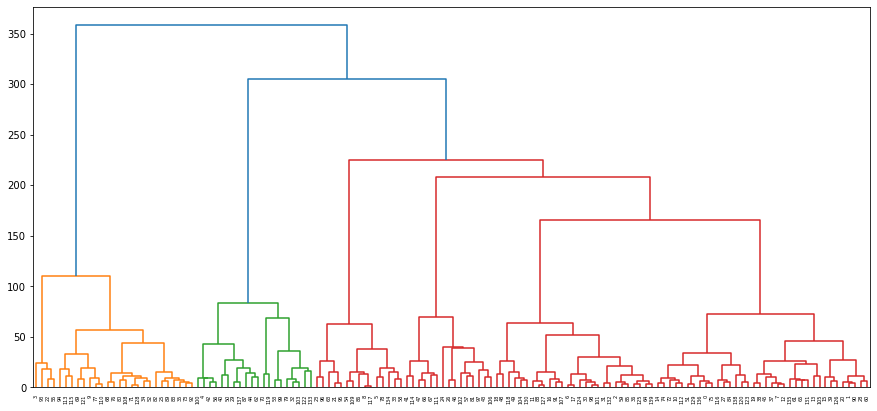

In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(X_train, 'ward')
plt.figure(figsize=(15, 7))
dendrogram(linked) 
plt.show()